This notebook is for preliminary steps of text preprocessing: stopwords removal, lowering case, lemmatization.. <hr>

In [1]:
import pandas as pd
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy
import seaborn as sns 
import matplotlib.pyplot as plt 

stemmer = PorterStemmer()

In [2]:
def load_tools(language, stopwords=stopwords):
    """
    Load open tasks in DataFrame from csv file.
    Define stopwords and lemmatizer appropriate to given language of data.
    """
    if language == "german": 
        stopwords = stopwords.words('german') 
        lemmatizer = spacy.load("de_core_news_sm") 
    elif language == "english": 
        stopwords = stopwords.words('english')
        lemmatizer = spacy.load('en_core_web_sm')
    else:
        raise language + " language not supported." 
    return stopwords, lemmatizer

def preprocess(text, lemmatizer, stopwords, stoplemmas, stemmer=stemmer):
    if isinstance(text, float):
        return ""
    # lowercase, remove punctuation, tokenize 
    words = simple_preprocess(text, deacc=True, min_len=1, max_len=50)
    # remove stopwords 
    tokens = [word for word in words if word not in stopwords]
    # stemming
    stems = [stemmer.stem(token) for token in tokens]
    # lemmatize
    stemmed_doc = lemmatizer(" ".join(stems))
    lemmas = [s.lemma_ for s in stemmed_doc]
    lemmas = [lemma for lemma in lemmas if lemma not in stoplemmas]
    # lowercase again (apparently stemming capitalizes the output) 
    lemmas = [lemma.lower() for lemma in lemmas] 
    return " ".join(lemmas)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

def get_bow(text_data):
    # create the vocabulary
    vectorizer = CountVectorizer(input='content', stop_words=None, ngram_range=(1,1))
    
    # fit the vocabulary to the text data
    vectorizer.fit(text_data)
    
    # create the bag-of-words model
    bow_model = vectorizer.transform(text_data)

    return vectorizer, bow_model

# Trimmed tasks: Preprocessing for model A

**German**

In [19]:
folder = "gen_files/DE/"
filename = "trimmed_open_tasks"

stopwords, lemmatizer = load_tools("german")

df = pd.read_csv(f"{folder}{filename}.csv") 
df["description"] = df["description"].apply(lambda text: preprocess(text,lemmatizer, stopwords, stoplemmas=[]))
df["word_count"] = df["description"].apply(lambda s: len(s.split())) 

In [20]:
data = df["description"].to_list() 
vectorizer, bow_model = get_bow(data)

In [21]:
freq_dict = {}
for word, id in vectorizer.vocabulary_.items(): 
    freq = bow_model[:, id].sum(axis=0) 
    freq_dict[word] = freq[0,0]

In [22]:
df_word_freq = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1], reverse=True))
df_word_freq.columns = ["words", "freq"]

/home/faten/anaconda3/envs/tb_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/faten/anaconda3/envs/tb_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


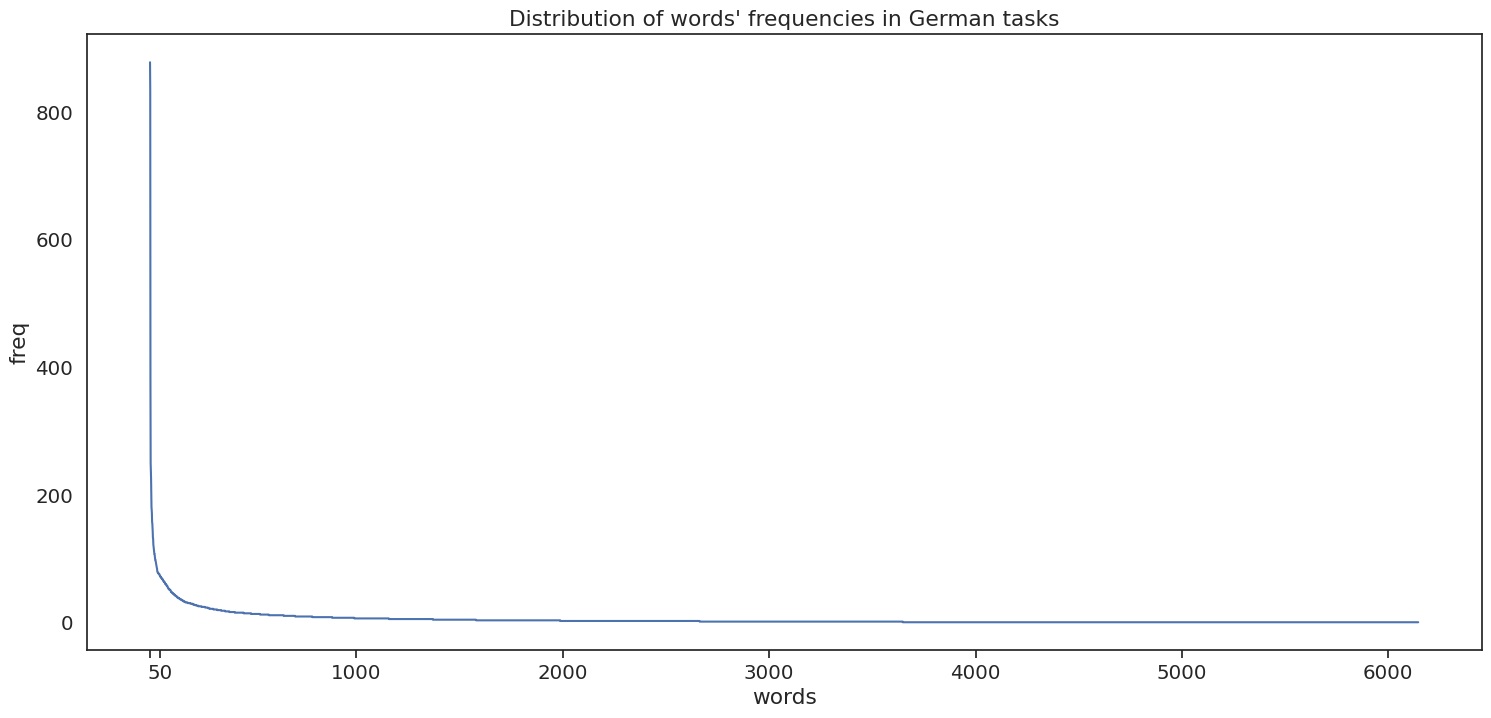

In [23]:
sns.set_theme(style='white', font_scale=1.3,
              rc={'figure.figsize':(18,8)})

sns.lineplot(data=df_word_freq, x="words", y="freq").set(title="Distribution of words' frequencies in German tasks")

# Get the current axes
ax = plt.gca()

# Define the desired xticks and xticklabels
ticks = list(range(0, 51, 50)) + list(range(1000, len(df_word_freq), 1000))

ax.set_xticks(ticks)
ax.set_xticklabels([""]+ticks[1:])
ax.tick_params(axis='x', which='both', bottom=True, top=False)

plt.savefig("figures/word_freq_DE", bbox_inches="tight") 

In [10]:
# df_word_freq.head(50)

In [12]:
stoplemmas = ["fur", "zwei", "drei", "geben", "bei", "immer", "gehen", "sehen"] 

df = pd.read_csv(f"{folder}{filename}.csv") 
df["description"] = df["description"].apply(lambda text: 
                                            preprocess(text, lemmatizer, stopwords, stoplemmas=stoplemmas))
df["word_count"] = df["description"].apply(lambda s: len(s.split()))  

df.to_csv(f"{folder}preprocessed/{filename}.csv", index_label=False)

**English**

In [24]:
folder = "gen_files/EN/"
filename = "trimmed_open_tasks"

stopwords, lemmatizer = load_tools("english")

df = pd.read_csv(f"{folder}{filename}.csv") 
df["description"] = df["description"].apply(lambda text: preprocess(text, lemmatizer, stopwords, stoplemmas=[]))
df["word_count"] = df["description"].apply(lambda s: len(s.split())) 

In [25]:
data = df["description"].to_list() 
vectorizer, bow_model = get_bow(data)

In [26]:
freq_dict = {}
for word, id in vectorizer.vocabulary_.items(): 
    freq = bow_model[:, id].sum(axis=0) 
    freq_dict[word] = freq[0,0]

In [27]:
df_word_freq = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1], reverse=True))
df_word_freq.columns = ["words", "freq"]

/home/faten/anaconda3/envs/tb_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/faten/anaconda3/envs/tb_venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


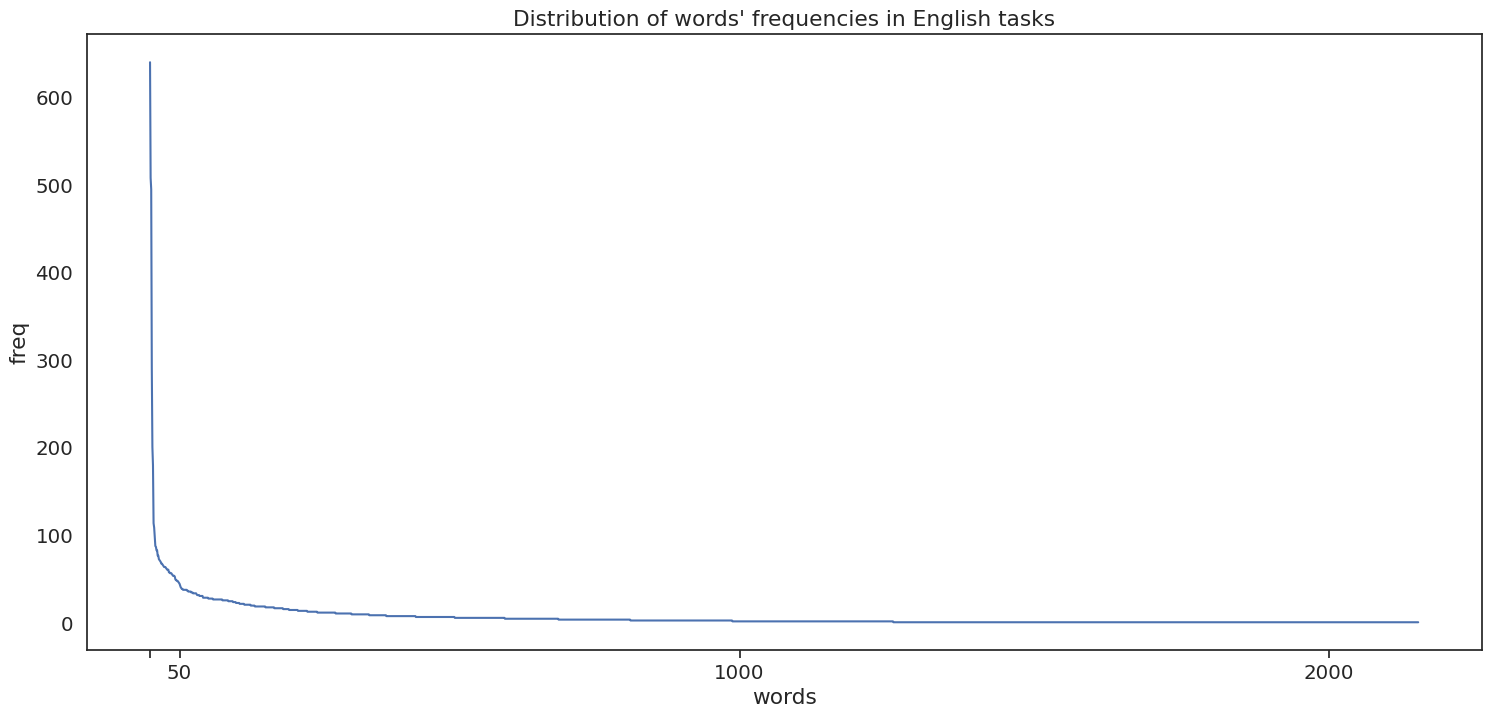

In [28]:
sns.set_theme(style='white', font_scale=1.3,
              rc={'figure.figsize':(18,8)})

sns.lineplot(data=df_word_freq, x="words", y="freq").set(title="Distribution of words' frequencies in English tasks")

# Get the current axes
ax = plt.gca()

# Define the desired xticks and xticklabels
ticks = list(range(0, 51, 50)) + list(range(1000, len(df_word_freq), 1000))

ax.set_xticks(ticks)
ax.set_xticklabels([""]+ticks[1:])
ax.tick_params(axis='x', which='both', bottom=True, top=False)

plt.savefig("figures/word_freq_EN", bbox_inches="tight") 

In [ ]:
# df_word_freq.head(50)

In [18]:
stoplemmas = ["like", "use", "say", "go", "one", "see", "luke", "two", "three", "ga", "come", "tom", "gwen", "make", "get", "chri"]

df = pd.read_csv(f"{folder}{filename}.csv") 
df["description"] = df["description"].apply(lambda text: preprocess(text, lemmatizer, stopwords, stoplemmas=stoplemmas))
df["word_count"] = df["description"].apply(lambda s: len(s.split()))  

df.to_csv(f"{folder}preprocessed/{filename}.csv", index_label=False)

<hr>

# Preprocessing for baseline model

**Tasks**

In [ ]:
folder = "gen_files/DE/"
filenames = [
    "tasks_BT_DE", 
    "tasks_RD_DE", 
    "tasks_RI_DE", 
    "tasks_RS_DE", 
    "tasks_SR_DE", 
]

stopwords, lemmatizer = load_tools("german")

for filename in filenames: 
    df = pd.read_csv(f"{folder}augmented/{filename}.csv") 
    df["description"] = df["description"].apply(lambda text: 
                                                preprocess(text, lemmatizer, stopwords, stoplemmas=[]))
    df["word_count"] = df["description"].apply(lambda s: len(s.split())) 
    df.to_csv(f"{folder}preprocessed/{filename}.csv", index_label=False)

filename = "open_tasks_DE"
df = pd.read_csv(f"{folder}{filename}.csv") 
df["description"] = df["description"].apply(lambda text: 
                                            preprocess(text, lemmatizer, stopwords, stoplemmas=[]))
df["word_count"] = df["description"].apply(lambda s: len(s.split())) 
df.to_csv(f"{folder}preprocessed/{filename}.csv", index_label=False)

In [ ]:
stopwords, lemmatizer = load_tools("english")
folder = "gen_files/EN/"

filenames = [
    "tasks_BT_EN", 
    "tasks_RD_EN", 
    "tasks_RI_EN", 
    "tasks_RS_EN", 
    "tasks_SR_EN", 
]

for filename in filenames: 
    df = pd.read_csv(f"{folder}augmented/{filename}.csv") 
    df["description"] = df["description"].apply(lambda text: 
                                                preprocess(text, lemmatizer, stopwords, stoplemmas=[]))
    df["word_count"] = df["description"].apply(lambda s: len(s.split())) 
    df.to_csv(f"{folder}preprocessed/{filename}.csv", index_label=False)

filename = "open_tasks_EN"
df = pd.read_csv(f"{folder}{filename}.csv") 
df["description"] = df["description"].apply(lambda text: 
                                            preprocess(text, lemmatizer, stopwords, stoplemmas=[]))
df["word_count"] = df["description"].apply(lambda s: len(s.split())) 
df.to_csv(f"{folder}preprocessed/{filename}.csv", index_label=False)

**Aspects**